



Epoch 1/10


1563/1563 [==============================] - 33s 19ms/step - loss: 1.5395 - accuracy: 0.4387 - val_loss: 1.2555 - val_accuracy: 0.5528
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1797 - accuracy: 0.5809 - val_loss: 1.1390 - val_accuracy: 0.5889
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0097 - accuracy: 0.6444 - val_loss: 0.9868 - val_accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9109 - accuracy: 0.6806 - val_loss: 0.9186 - val_accuracy: 0.6810
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8387 - accuracy: 0.7066 - val_loss: 0.8988 - val_accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7759 - accuracy: 0.7276 - val_loss: 0.8618 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7274 - accuracy: 0.7455 - val_loss: 0.

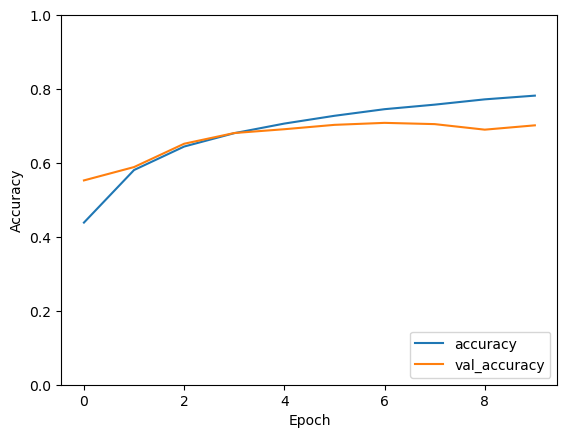

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

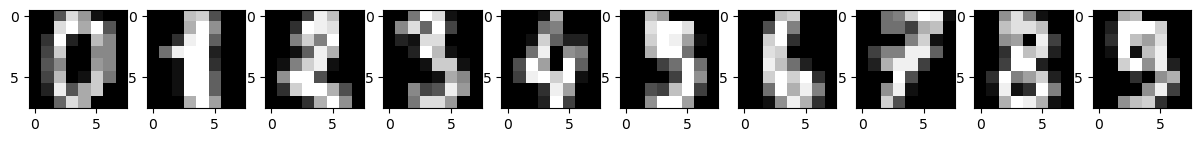

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the digits dataset
digits = load_digits()

# Visualize some of the digits
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(np.reshape(digits.images[i], (8, 8)), cmap=plt.cm.gray)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
